In [3]:
import requests
import pandas as pd
stock_url = "https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=25&offset=0&download=true"
etf_url = "https://api.nasdaq.com/api/screener/etf?tableonly=true&limit=25&offset=0&download=true"
headers = {"Accept-Language":"en-US,en;q=0.9","Accept-Encoding":"gzip, deflate, br","User-Agent":"Java-http-client/"}

In [4]:
stock_response = requests.get(stock_url, headers=headers)

In [11]:
etf_response = requests.get(etf_url, headers=headers)
st_json = stock_response.json()
et_json = etf_response.json()

In [12]:
import yfinance as yf

In [13]:
len(st_json['data']['rows'])

7471

In [27]:
len(et_json['data']['data']['rows'])

2850

In [28]:
#et_json

In [29]:
st_df = pd.DataFrame(st_json['data']['rows'])

In [30]:
et_df = pd.DataFrame(et_json['data']['data']['rows'])

In [100]:
yf.Ticker('SQQQ').get_institutional_holders()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [123]:
etf_tickers = yf.Tickers(list(et_df.symbol))

In [176]:
%%time
etf_details=[]
for k,v in list(etf_tickers.tickers.items()):
    try:
        aa=v.get_institutional_holders()
        etf_details.append(aa.set_index(0).T.assign(symbol=k))
    except Exception as e:
        print("error for ", k, len(etf_details))

error for  VGIT 315


KeyboardInterrupt: 

In [177]:
pd.concat(etf_details).shape

(513, 9)

In [178]:
aa = yf.Ticker('SQQQ').get_institutional_holders()

In [161]:
aa.set_index(0).T.assign(symbol='SQQQ')

,Net Assets,NAV,PE Ratio (TTM),Yield,YTD Daily Total Return,Beta (5Y Monthly),Expense Ratio (net),Inception Date,symbol
1,4.74B,17.07,NaN,3.29%,-67.76%,-3.46,0.95%,2010-02-09,SQQQ


In [120]:
for p in yf.Tickers(['SQQQ','SPY']).etf_tickers.values():
    print(p.get_institutional_holders())

                        0           1
0              Net Assets       4.74B
1                     NAV       17.07
2          PE Ratio (TTM)         NaN
3                   Yield       3.29%
4  YTD Daily Total Return     -67.76%
5       Beta (5Y Monthly)       -3.46
6     Expense Ratio (net)       0.95%
7          Inception Date  2010-02-09
                        0           1
0              Net Assets     422.72B
1                     NAV      450.90
2          PE Ratio (TTM)       22.71
3                   Yield       1.47%
4  YTD Daily Total Return      18.78%
5       Beta (5Y Monthly)        1.00
6     Expense Ratio (net)       0.09%
7          Inception Date  1993-01-22


In [104]:
yf.Ticker('SQQQ').get_institutional_holders()

,0,1
0,Net Assets,4.74B
1,NAV,17.07
2,PE Ratio (TTM),NaN
3,Yield,3.29%
4,YTD Daily Total Return,-67.76%
5,Beta (5Y Monthly),-3.46
6,Expense Ratio (net),0.95%
7,Inception Date,2010-02-09


In [121]:
etf_tickers = list(et_df.symbol)

In [39]:
et_tf_data_1 =yf.Tickers(list(et_df.symbol[:1400])).download()
et_tf_data_2 = yf.Tickers(list(et_df.symbol[1400:])).download()

[*********************100%***********************]  1400 of 1400 completed
[*********************100%***********************]  1450 of 1450 completed


In [40]:
et_tf_data= pd.concat([et_tf_data_1,et_tf_data_2], axis =1)

In [53]:
et_tf_data['Volume'].iloc[-1].sort_values(ascending = False).head(20)

SQQQ    85353700
TQQQ    72413100
SOXS    67170100
SPY     52606000
SOXL    49904500
QQQ     40789100
XLF     38548900
LABU    36689500
HYG     28836600
FXI     26913300
PSQ     26024300
EEM     25782900
IWM     23249400
EWZ     20566800
TLT     18822000
XLE     16222900
SPXU    15885700
EFA     15876600
TSLL    15766400
KWEB    14697600
Name: 2023-07-17 00:00:00, dtype: int64

<AxesSubplot: xlabel='Date'>

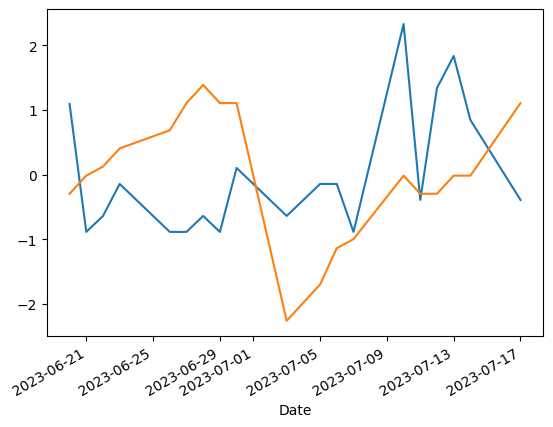

In [97]:
((et_tf_data['Volume']['AAA']-et_tf_data['Volume']['AAA'].mean())/(et_tf_data['Volume']['AAA'].std())).plot()
((et_tf_data['Close']['AAA']-et_tf_data['Close']['AAA'].mean())/(et_tf_data['Close']['AAA'].std())).plot()

<AxesSubplot: xlabel='Date'>

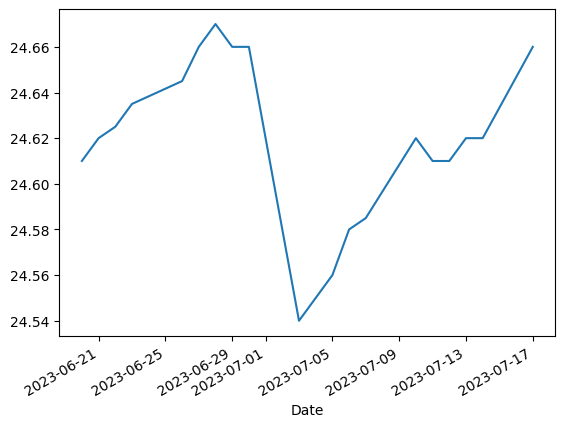

In [95]:
et_tf_data['Close']['AAA'].plot()

In [ ]:
nasdaq_df['volume']=nasdaq_df.volume.apply(lambda x : float(x) if len(x)>0 else None)
nasdaq_df['marketCap']= nasdaq_df.marketCap.apply(lambda x : float(x) if len(x)>0 else None)
nasdaq_df['lastsale']= nasdaq_df.lastsale.apply(lambda x : float(x[1:]) if len(x)>0 else None)
nasdaq_df= nasdaq_df.dropna()
nasdaq_df= nasdaq_df[nasdaq_df['marketCap'] !=0]

In [ ]:
import numpy as np

In [ ]:
np.inf

In [ ]:
nasdaq_df['liq_ratio'] = (nasdaq_df.volume*nasdaq_df.lastsale)/nasdaq_df.marketCap

In [ ]:
nasdaq_df[nasdaq_df['liq_ratio'] !=np.inf].sort_values('liq_ratio', ascending=False).head(20)

In [ ]:
nasdaq_df.sort_values('liq_ratio', ascending=False).head(20)

In [ ]:
import matplotlib.pyplot as plt 

plt.hist(np.log(nasdaq_df['marketCap']))

In [ ]:
plt.hist(np.log(nasdaq_df['volume']))

In [ ]:
nasdaq_df['log_volume'] = np.log(nasdaq_df['volume'] )

In [ ]:
nasdaq_df['log_marketCap'] = np.log(nasdaq_df['marketCap'] )

In [ ]:
nasdaq_df=nasdaq_df[(nasdaq_df['log_volume']>8) &(nasdaq_df['log_marketCap']>15)]

In [ ]:
plt.hist(np.log(nasdaq_df['liq_ratio']))

In [ ]:
nasdaq_df.shape

In [ ]:
nasdaq_df=nasdaq_df.sort_values('liq_ratio', ascending=False).head(50)

In [ ]:
nasdaq_df.symbol

In [ ]:
nasdaq_df=nasdaq_df[nasdaq_df['country']=='United States']

In [ ]:
nasdaq_df.head()

In [ ]:
import yfinance as yf
all_data =  yf.Tickers(nasdaq_df.symbol[:2400].to_list()).download()

In [ ]:
#all_data = pd.concat([half_data['Close'],rest_data['Close']], axis =1)

In [ ]:
all_data.shape

In [ ]:
all_data.head()

In [ ]:
all_data=all_data['Close']

In [ ]:
all_data_sma5=all_data.pct_change().rolling(window=5).mean()
all_data_sma10=all_data.pct_change().rolling(window=10).mean()

In [ ]:
all_data_sma10

In [ ]:
high_val=all_data_sma5.T[(all_data_sma5>all_data_sma10).iloc[-1].values]

In [ ]:
high_val

In [ ]:
all_data[high_val.index].std().sort_values()

In [ ]:
high_val=all_data_sma5.T[(all_data_sma5>all_data_sma10).iloc[-1].values]

In [ ]:
nasdaq_df[nasdaq_df.symbol.isin(high_val.index)].groupby('sector').count()['symbol']